# UFC EDA Project
- This project is to showcase data cleaning, data visualization and statistical analysis skills
- This project was influenced by Reinz, a kaggle contributor, who performed his own UFC EDA project and compiled the data sets. I leveraged some of his code to help put together this project and improved areas where I saw an opportunity to do so. I want to make sure he gets the credit he deserves. 


In [1]:
# Import needed packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#Create dataframe which houses fighter details
fighter_details = pd.read_csv('input/ufc_data/raw_fighter_details.csv')

#Create dataframe which houses raw fight details
df = pd.read_csv('input/ufc_data/raw_total_fight_data.csv', sep=';')

In [3]:
# Get a look at the data
df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,23 of 51,...,0 of 0,KO/TKO,3,0:27,3 Rnd (5-5-5),Chris Tognoni,"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,75 of 110,...,1 of 2,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,2 of 6,...,0 of 0,KO/TKO,1,0:49,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,136 of 168,...,0 of 0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,92 of 184,...,2 of 4,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson


In [4]:
fighter_details.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,NaN,155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0


In [5]:
# Get an idea of how many non-null cells in each respective column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   R_fighter        6012 non-null   object
 1   B_fighter        6012 non-null   object
 2   R_KD             6012 non-null   int64 
 3   B_KD             6012 non-null   int64 
 4   R_SIG_STR.       6012 non-null   object
 5   B_SIG_STR.       6012 non-null   object
 6   R_SIG_STR_pct    6012 non-null   object
 7   B_SIG_STR_pct    6012 non-null   object
 8   R_TOTAL_STR.     6012 non-null   object
 9   B_TOTAL_STR.     6012 non-null   object
 10  R_TD             6012 non-null   object
 11  B_TD             6012 non-null   object
 12  R_TD_pct         6012 non-null   object
 13  B_TD_pct         6012 non-null   object
 14  R_SUB_ATT        6012 non-null   int64 
 15  B_SUB_ATT        6012 non-null   int64 
 16  R_REV            6012 non-null   int64 
 17  B_REV            6012 non-null   

In [6]:
df.columns

Index(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_REV', 'B_REV', 'R_CTRL', 'B_CTRL', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee', 'date', 'location',
       'Fight_type', 'Winner'],
      dtype='object')

In [7]:
columns = ['R_SIG_STR.', 'B_SIG_STR.', 'R_TOTAL_STR.', 'B_TOTAL_STR.', 'R_TD', 'B_TD', 'R_HEAD', 
           'B_HEAD', 'R_BODY', 'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH', 'B_CLINCH', 'R_GROUND', 'B_GROUND']

In [8]:
attemp = '_att'
landed = '_landed'

# create columns that break out attempted and landed 
for column in columns:
    df[column + attemp] = df[column].apply(lambda X: int(X.split('of')[1]))
    df[column + landed] = df[column].apply(lambda X: int(X.split('of')[0]))
    
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   R_fighter            6012 non-null   object
 1   B_fighter            6012 non-null   object
 2   R_KD                 6012 non-null   int64 
 3   B_KD                 6012 non-null   int64 
 4   R_SIG_STR.           6012 non-null   object
 5   B_SIG_STR.           6012 non-null   object
 6   R_SIG_STR_pct        6012 non-null   object
 7   B_SIG_STR_pct        6012 non-null   object
 8   R_TOTAL_STR.         6012 non-null   object
 9   B_TOTAL_STR.         6012 non-null   object
 10  R_TD                 6012 non-null   object
 11  B_TD                 6012 non-null   object
 12  R_TD_pct             6012 non-null   object
 13  B_TD_pct             6012 non-null   object
 14  R_SUB_ATT            6012 non-null   int64 
 15  B_SUB_ATT            6012 non-null   int64 
 16  R_REV 

In [9]:
pct_columns = ['R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']

#fix for rows that have "---" as a string so you can convert to fraction.                              
for column in pct_columns:                                  
    df[column] = df[column].apply(lambda X: X.replace('---', '0.00%'))
    

In [10]:
#Turn percent into fraction
for column in pct_columns:
    df[column] = df[column].apply(lambda X: float(X.replace('%',''))/100)

### Create a method that will allow me to create a weigh_class column easily

In [11]:
def Division(x):
    for Division in weight_classes:
        if Division in x:
            return Division
    if x == 'Catch Weight Bout' or 'Catchweight Bout':
        return 'Catch weight'
    else:
        return 'Open Weight'

In [12]:
weight_classes = ['Women\'s Strawweight', 'Women\'s Bantamweight', 
                  'Women\'s Featherweight', 'Women\'s Flyweight', 'Lightweight', 
                  'Welterweight', 'Middleweight','Light Heavyweight', 
                  'Heavyweight', 'Featherweight','Bantamweight', 'Flyweight', 'Open Weight']
df['weight_class'] = df['Fight_type'].apply(Division)

In [13]:
# Show how many fights there have been by weight class
df.weight_class.value_counts()

Lightweight              1091
Welterweight             1083
Middleweight              813
Heavyweight               585
Light Heavyweight         573
Featherweight             551
Bantamweight              475
Flyweight                 230
Women's Strawweight       192
Women's Bantamweight      151
Women's Flyweight         112
Open Weight                86
Catch weight               54
Women's Featherweight      16
Name: weight_class, dtype: int64

### Create a method to return the number of rounds in the fight

In [14]:
def get_rounds(x):
    if x == 'No Time Limit':
        return 1
    else:
        return len(x.split('(')[1].replace(')', '').split('-'))

In [15]:
df['no_of_rounds'] = df['Format'].apply(get_rounds)

In [16]:
# See how many null values there are in the Winner column
df.Winner.isnull().value_counts()

False    5902
True      110
Name: Winner, dtype: int64

In [17]:
#Fill the null value with a Draw
df["Winner"].fillna('Draw', inplace=True)

### Create a method to rename the winner column by the color of the fighter.
- This will make my analysis easier when I am seeing relationships between the winning fighter and their attributes

In [18]:
def get_renamed_winner(row):
    if row['R_fighter'] == row['Winner']:
        return 'Red'
    elif row['B_fighter'] == row['Winner']:
        return 'Blue'
    else:
        return 'Draw'

In [19]:
df['Winner'] = df[['R_fighter', 'B_fighter', 'Winner']].apply(get_renamed_winner, axis=1)

In [20]:
df.Winner.value_counts()

Red     3979
Blue    1923
Draw     110
Name: Winner, dtype: int64

In [21]:
#Turn Inches to CM
#Merge Fighter Data with Match Data
#Get fighter Age
import re
fighter_details.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,NaN,155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0


In [22]:
# Turn the height from inches into cm. Created a regex that would allow me turn any height into cm
fighter_details['Height'] = fighter_details.Height.str.extract(r'(\d+)\'\s*(\d+)"').astype(float).mul([12*2.54, 2.54]).sum(axis=1)

In [23]:
# Cleaned the weight column so it would be a float data type
fighter_details['Weight'] = fighter_details.Weight.apply(lambda x: float(x.replace(' lbs.', '')) if x is not np.NaN else x)

In [24]:
fighter_details.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,0.00,155.0,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,180.34,185.0,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,190.50,235.0,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,180.34,155.0,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,167.64,145.0,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0


### Merge dataframes now to perform further data cleaning

In [25]:
# Create merged fighter dataframe to pull in Red fighters and distinguish them from Blue fighter
new = df.merge(fighter_details, left_on='R_fighter', right_on='fighter_name', how='left')

In [26]:
new = new.drop('fighter_name', axis=1)

In [27]:
# Rename columns to distinguish the Red fighters attributes
new.rename(columns=
    {
    'Height': 'R_Height',
    'Weight': 'R_Weight',
    'Reach': 'R_Reach',
    'Stance': 'R_Stance',
    'DOB': 'R_DOB'
    }, inplace=True
          )

In [28]:
# Create merged fighter dataframe to pull in Blue fighters and distinguish them from Red fighter
new = new.merge(fighter_details, left_on='B_fighter', right_on='fighter_name', how='left')

In [29]:
new = new.drop('fighter_name', axis=1)

In [30]:
# Rename columns to distinguish the Red fighters attributes
new.rename(columns=
    {
    'Height': 'B_Height',
    'Weight': 'B_Weight',
    'Reach': 'B_Reach',
    'Stance': 'B_Stance',
    'DOB': 'B_DOB'
    }, inplace=True
          )

In [31]:
#Get fighters age by turning their DOB column into a datetime data type
new['R_DOB'] = pd.to_datetime(new['R_DOB'])
new['B_DOB'] = pd.to_datetime(new['B_DOB'])
new['date'] = pd.to_datetime(new['date'])

In [32]:
# Extract the year the fighter was born as well as the year of the fight
new['R_year'] = new['R_DOB'].apply(lambda x: x.year)
new['B_year'] = new['B_DOB'].apply(lambda x: x.year)
new['date_year'] = new['date'].apply(lambda x: x.year)

### Method that will return the age of the fighter at the time of the fight.

In [33]:
def get_age(row):
    B_age = (row['date_year'] - row['B_year'])
    R_age = (row['date_year'] - row['R_year'])
    
    if np.isnan(B_age) != True:
        B_age = B_age
    if np.isnan(R_age) != True:
        R_age = R_age
    return pd.Series([B_age, R_age], index=['B_age', 'R_age'])

In [34]:
# Create two new columns with the fighter's ages at the time of the fight.
new[['B_age','R_age']] = new[['date_year','B_year','R_year']].apply(get_age, axis=1)

In [35]:
# Drop the columns that were used to create the fighter age columns
new.drop(['R_DOB','B_DOB','date_year','R_year','B_year'], axis=1, inplace=True)

In [36]:
# Get the country from the location column
new['country'] = new['location'].apply(lambda x: x.split(',')[-1])

In [37]:
# Create a new date_year column utilizing the date column.
new['date_year'] = new['date'].apply(lambda x: x.year)

In [38]:
# Get all of the years the UFC has been in existence
values = new['date_year'].sort_values(ascending=False).value_counts().sort_index()

In [39]:
labels = values.index

### Plot a bar chart showing Number of fights by year.

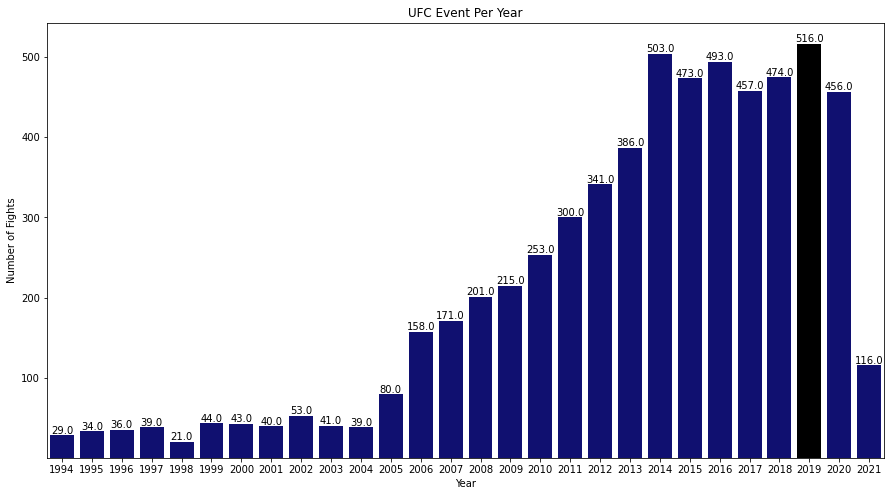

In [40]:
clrs = ['navy' if (y < max(values)) else 'black' for y in values]

plt.figure(figsize=(15,8))
bar = sns.barplot(x=labels, y=values, palette=clrs)

ax = plt.gca()
y_max = values.max()
ax.set_ylim(1)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=10, color='black', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Number of Fights')
plt.title('UFC Event Per Year')
plt.show()

- As we can see, the UFC had a breakout year in 2006 by almost doubling the number of events that year. This may be because the UFC had more television deals as well as better marketing plan. A combination of these two would increase PPV buys. This would be interesting to look at in another project. 
- 2019 had the most fights in one year so far. It looks like the UFC may have to innovate in order to increase the number of fights per year as they have not had a dramatic growth since 2005-201

### Create a chart showing UFC events by Country

/Users/treygarcia/opt/anaconda3/envs/book_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


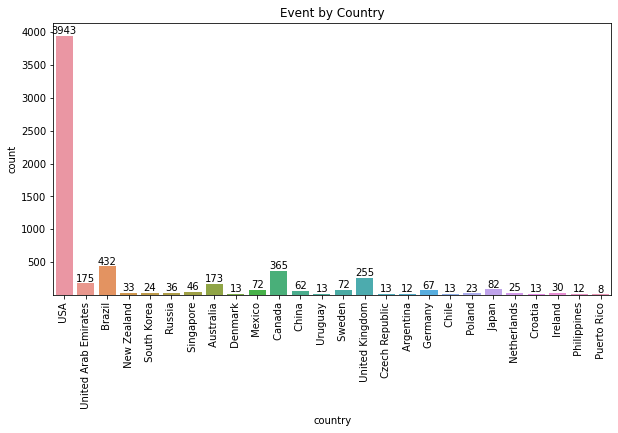

In [41]:
plt.figure(figsize=(10,5))
bar = sns.countplot(new['country'])
plt.xticks(rotation=90)
ax = plt.gca()
y_max = new['country'].value_counts().max()
ax.set_ylim(1)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=10, color='black', ha='center', va='bottom')
plt.title('Event by Country')
plt.show()

- As expected, the USA has hosted the most fights by a wide margin. It would be intersting to see if the UFC will make plans to do more events worldwide as a play to get more international recognition.

## Analysis to see a breakout of number of women fights vs men fights

In [42]:
# Get number of women fights
women = new.weight_class.str.contains('Women').astype(int).sum()

In [43]:
# Get number of men fights
men = (len(new['weight_class'])) - women

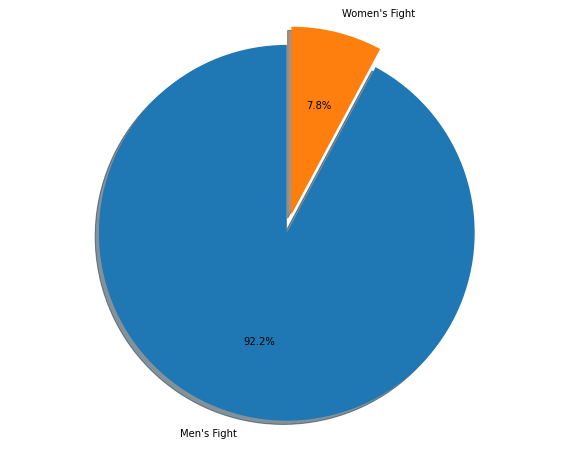

In [44]:
# Create pie chart showig amount of men to women fights
labels = 'Men\'s Fight', 'Women\'s Fight'
sizes = [men, women]
explode = (0,0.1)

fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

- The majority of fights in the UFC have been men's fights. As a UFC enthusiast I know there are more women's fights every year and I believe in the next couple of years we will see the women's fights percentage go up. Women's fights were only introduced in 2013.

### Find the win distribution between red and blue side

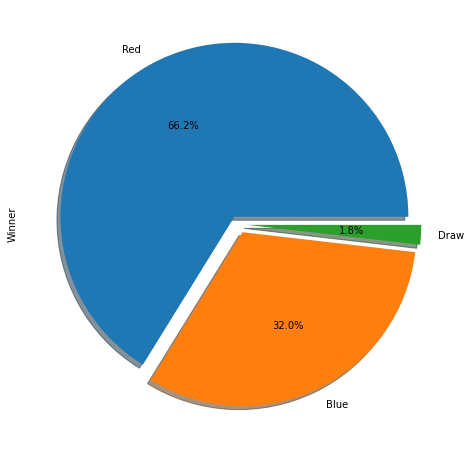

In [45]:
plt.figure(figsize=(15,8))
new['Winner'].value_counts().plot.pie(explode=[0.05,0.05,0.05], autopct='%1.1f%%', shadow=True)
plt.show()

- This shows that the red fighter wins the majority of the fights but this does not tell us that being the color red provides any inherent benefits

# Lets see how age affects the winner of the match

In [46]:
# Replace the null age values with the median
new['R_age'] = new['R_age'].fillna(new['R_age'].median())

In [47]:
new['B_age'] = new['B_age'].fillna(new['B_age'].median())

/Users/treygarcia/opt/anaconda3/envs/book_env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/treygarcia/opt/anaconda3/envs/book_env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


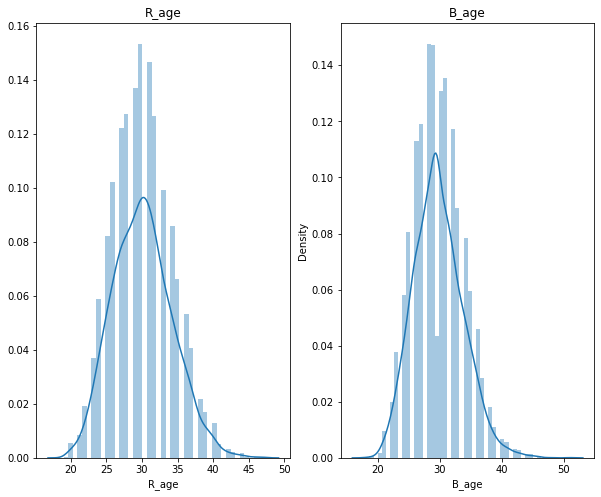

In [48]:
# Create two histogram charts to show age distribution.

f, ax = plt.subplots(1,2,figsize=(10,8))
sns.distplot(new['R_age'], ax=ax[0])

ax[0].set_title('R_age')
ax[0].set_ylabel('')
hist = sns.distplot(new['B_age'], ax=ax[1])

ax[1].set_title('B_age')

plt.show()

- The ages look to be normally distributed which makes sense since you do not see many fighters pas the age of 40 or under the age of 20

# Lets group by age for red and blue fighters who won their fight

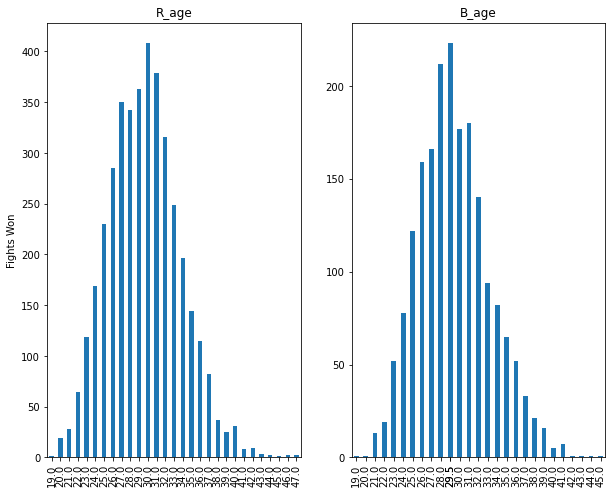

In [49]:
f, ax = plt.subplots(1,2,figsize=(10,8))


new[new.Winner == 'Red']['R_age'].value_counts(sort=True, ascending=False).plot.bar(ax=ax[0])

ax[0].set_title('R_age')
ax[0].set_ylabel('Fights Won')
bar = new[new.Winner == 'Blue']['B_age'].value_counts().plot.bar(ax=ax[1])

ax[1].set_title('B_age')

plt.show()

- As we can see the ages between 26-33 are when most fights are won. We can interpret this as the prime years for a UFC fighter. 

# Let's see how height can affect the match

In [50]:
# clean reach to become a float value
new['R_Reach'] = new.R_Reach.apply(lambda x: float(x.replace('\"', '')) if x is not np.NaN else x)
new['B_Reach'] = new.B_Reach.apply(lambda x: float(x.replace('\"', '')) if x is not np.NaN else x)

In [51]:
# replace 0's in height column with median height
new['R_Height'] = new['R_Height'].replace(0, new['R_Height'].median())

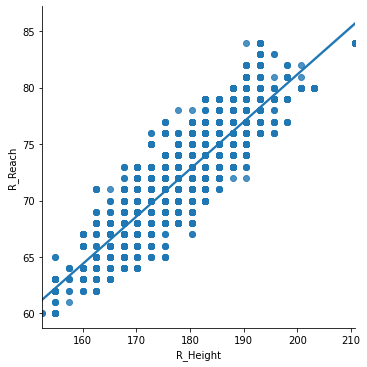

In [52]:
# plot relationship between height and reach
g = sns.lmplot(x='R_Height', y='R_Reach', data=new)

- As expected, the taller a fighter is the longer their reach is. 

### Compare height between red and blue fighters

In [53]:
new['B_Height'] = new['B_Height'].replace(0, new['B_Height'].median())

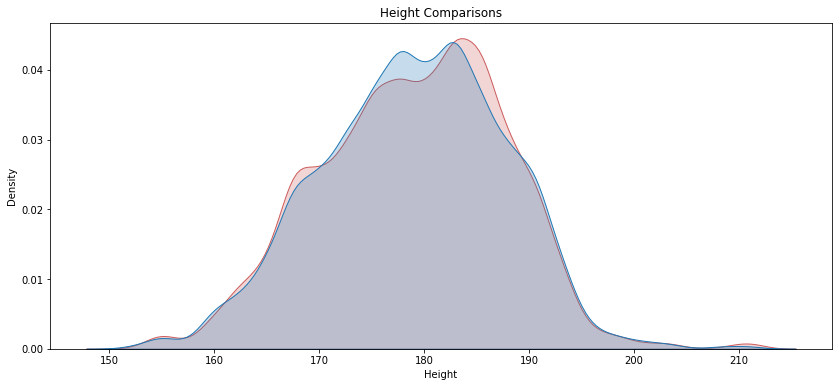

In [54]:
#Show overlapping KDE plot of height for each color of fighter
fig, ax = plt.subplots(figsize=(14,6))

sns.kdeplot(new.R_Height, shade=True, color='indianred', label='Red')
sns.kdeplot(new.B_Height, shade=True, label='Blue')

plt.xlabel('Height')
plt.title('Height Comparisons')
plt.show()

- The fighters look to be very similar in height which would make sense since fighters in the same weight class would also be close in height.
- As an example, I would not expect to see a 6'5 fighter vs a 5'5 fighter in the lightweight division

In [55]:
### Show number of fights by weightclass

In [56]:
new.weight_class.value_counts()

Lightweight              1091
Welterweight             1083
Middleweight              813
Heavyweight               585
Light Heavyweight         573
Featherweight             551
Bantamweight              475
Flyweight                 230
Women's Strawweight       192
Women's Bantamweight      151
Women's Flyweight         112
Open Weight                86
Catch weight               54
Women's Featherweight      16
Name: weight_class, dtype: int64

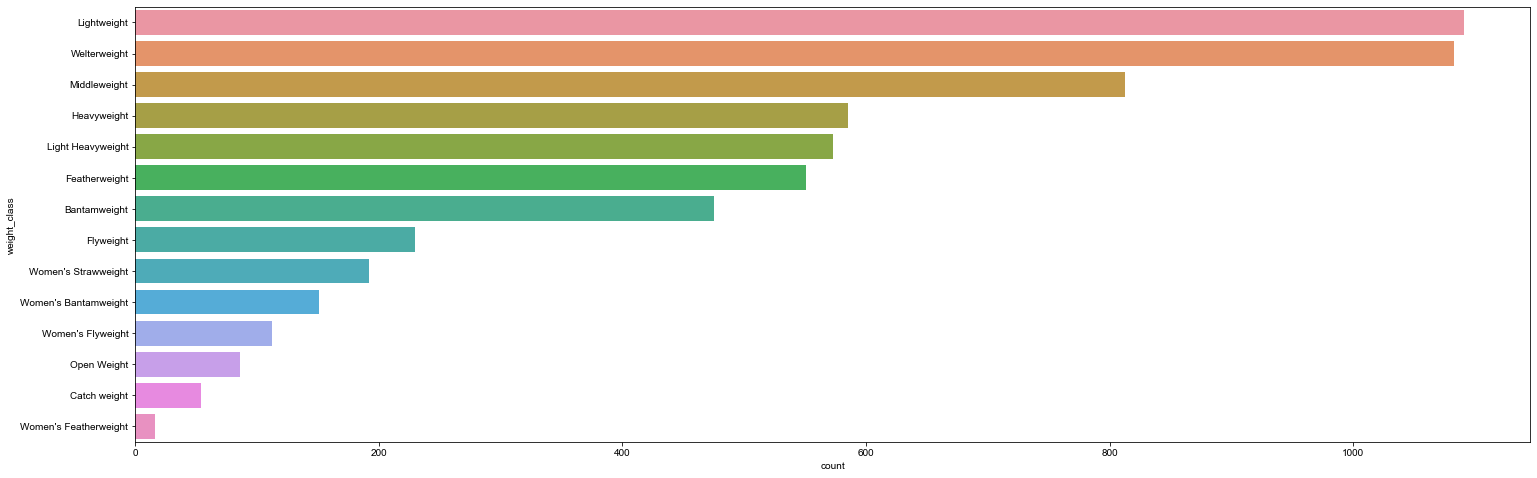

In [57]:
# Show bar chart for number of fights in each weight class. Show in descending order
plt.figure(figsize=(25,8))
sns.countplot(data = new, y='weight_class', order = new['weight_class'].value_counts().index)

sns.set(style='white')
plt.show()

- Looks like the lightweight and welterweight divisions have the most fights in total. This would make sense as more people would naturally fall within those weight classes.

# How did the fighter win? 

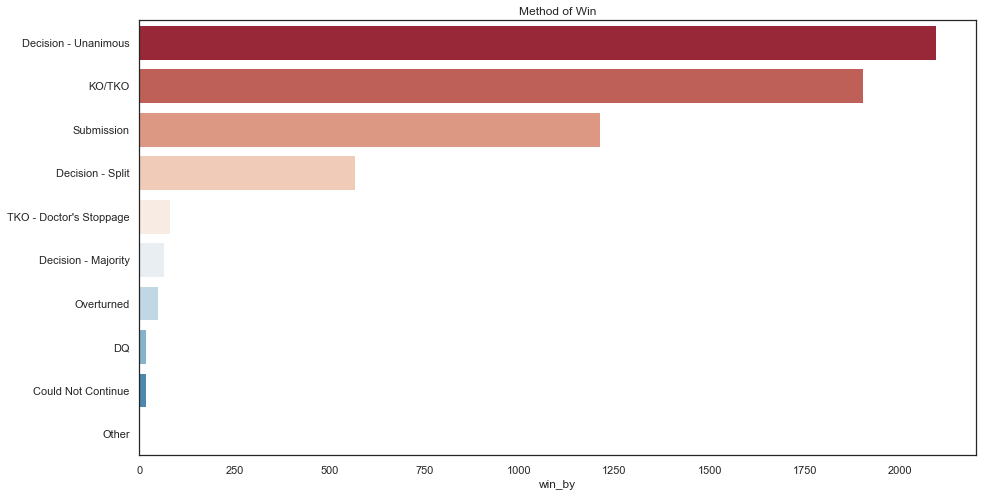

In [58]:
values = new.win_by.value_counts()
labels = values.index

plt.figure(figsize=(15,8))

sns.barplot(x=values, y=labels, palette='RdBu')

plt.title('Method of Win')
plt.show()

- Fights are won mostly by Unanimoius Decision or KO/TKO. 
- This makes sense since the nature of the sport is very violent with minimal protection to the head. This would lead to many KO/TKOs

### Show UFC outcome by weightclass

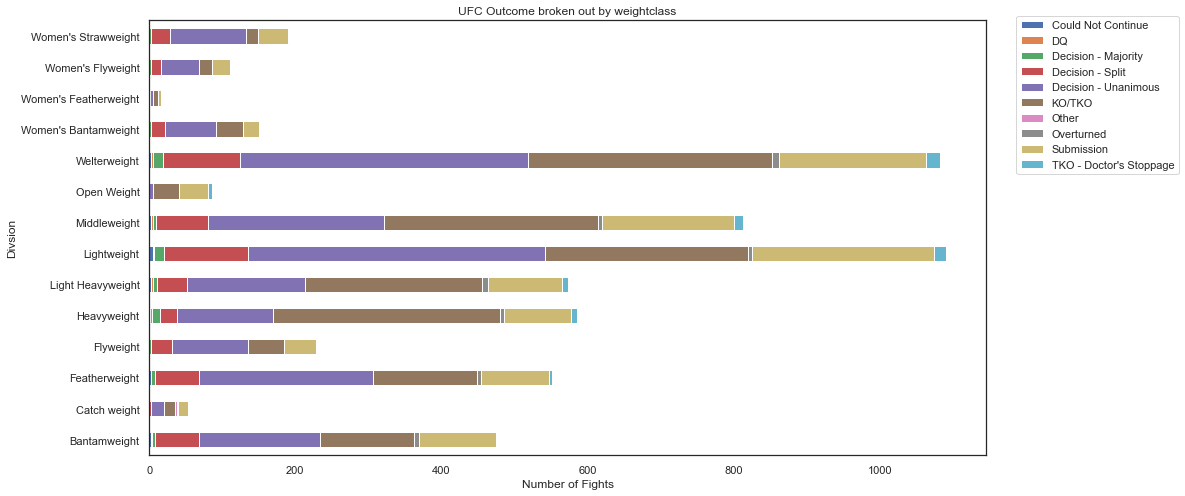

In [59]:
bar = new.groupby(['weight_class','win_by']).size().reset_index().pivot(columns='win_by',index='weight_class', values=0)
bar.plot(kind='barh',stacked=True,figsize=(15,8))
plt.legend(bbox_to_anchor=(1.23,1.01), loc=1, borderaxespad=0)
plt.title('UFC Outcome broken out by weightclass')
plt.xlabel('Number of Fights')
plt.ylabel('Divsion')
plt.show()

- As expected we see unanimous decisions and KOs/TKOs as the most common outcomes by weightclass. 

# UFC outcome broken out by year

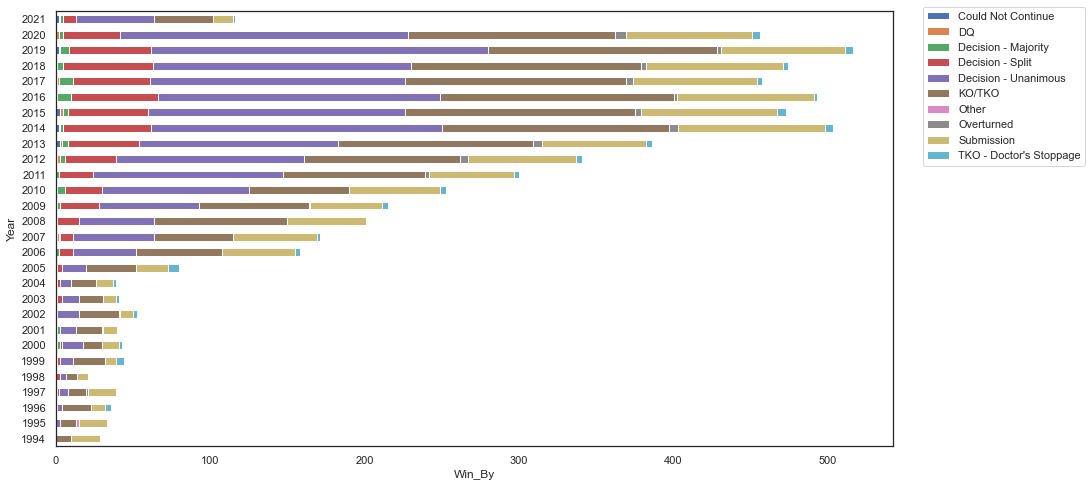

In [60]:
new_bar = new.groupby(['date_year','win_by']).size().reset_index().pivot(columns='win_by', index='date_year',values=0)
new_bar.plot(kind='barh',stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.23,1.01), loc=1, borderaxespad=0)
plt.xlabel('Win_By')
plt.ylabel('Year')
plt.show()

- We see that as time has gone on, the ratio of unanimous decisions to KO/TKO still looks to be holding around the same across years since 2006.

# Attempted vs landed strikes

In [61]:
attempted = pd.concat([new['R_TOTAL_STR._att'], new['B_TOTAL_STR._att']], ignore_index=True)
landed = pd.concat([new['R_TOTAL_STR._landed'], new['B_TOTAL_STR._landed']], ignore_index=True)

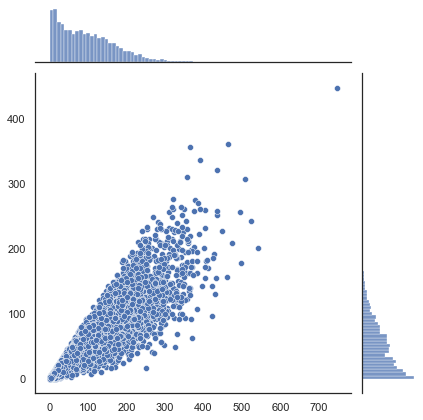

In [62]:
sns.jointplot(x=attempted, y=landed)
plt.show()

- The more strikes thrown is highly correlated with more strikes landed. This tells me having a higher volume of strikes may be beneficial for fighters who have the cardio to do so as that means they will land more strikes on average.

### Find out who has the most fights in the UFC

In [63]:
Fighter = pd.concat([new['R_fighter'], new['B_fighter']], ignore_index=True)

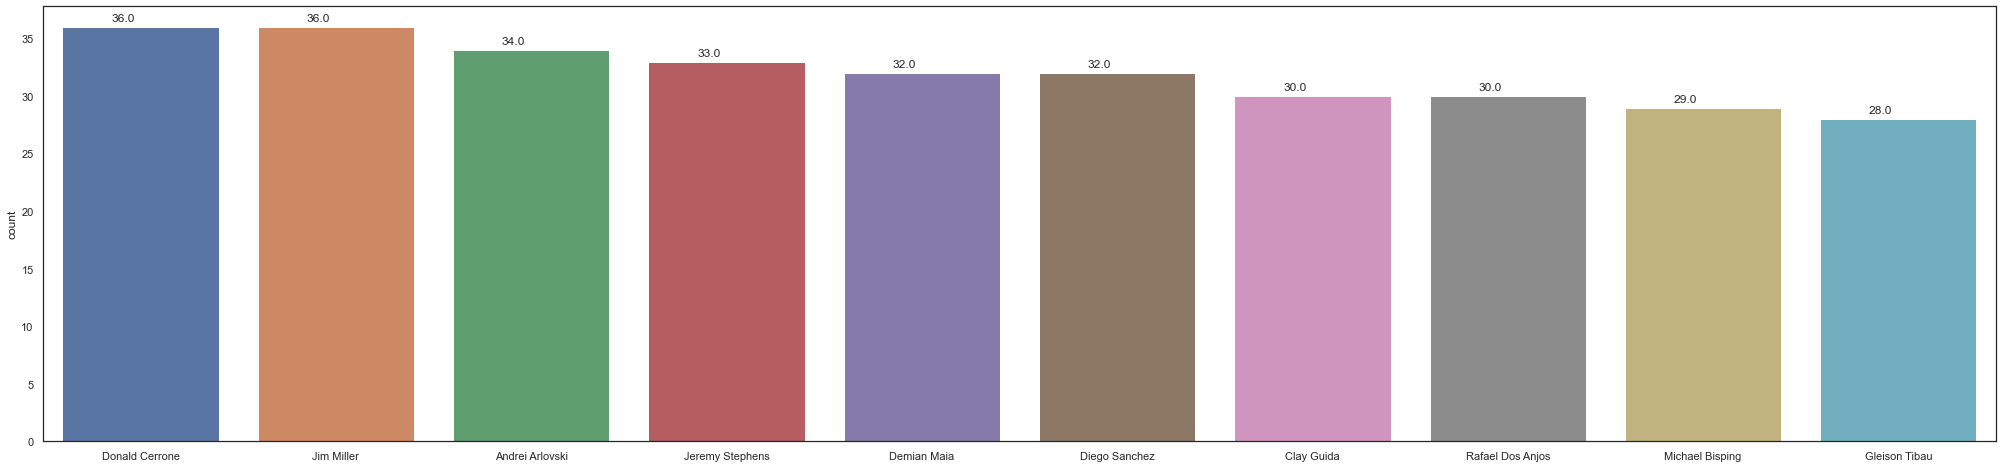

In [64]:
# Chart showing top 10 athletes who have fought the most in the UFC

plt.figure(figsize=(35,8))
ax = sns.countplot(x = Fighter, order = pd.value_counts(Fighter).iloc[:10].index)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.5))
plt.show()

# add labels to count plot

- Jim Miller and Donald Cerrone have the most fights in the UFC at 36 fights each. 

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, RandomizedSearchCV


import warnings
warnings.filterwarnings("ignore")

# Solve the null values problem

In [66]:
# Perform a deep copy of the "new" dataframe
new_df = new.copy()
pd.options.display.max_rows = None # Use this line to show all the rows instead of cutting them off. 

In [67]:
new_df.isnull().sum() # This will show how many null values there are for each column

R_fighter                0
B_fighter                0
R_KD                     0
B_KD                     0
R_SIG_STR.               0
B_SIG_STR.               0
R_SIG_STR_pct            0
B_SIG_STR_pct            0
R_TOTAL_STR.             0
B_TOTAL_STR.             0
R_TD                     0
B_TD                     0
R_TD_pct                 0
B_TD_pct                 0
R_SUB_ATT                0
B_SUB_ATT                0
R_REV                    0
B_REV                    0
R_CTRL                   0
B_CTRL                   0
R_HEAD                   0
B_HEAD                   0
R_BODY                   0
B_BODY                   0
R_LEG                    0
B_LEG                    0
R_DISTANCE               0
B_DISTANCE               0
R_CLINCH                 0
B_CLINCH                 0
R_GROUND                 0
B_GROUND                 0
win_by                   0
last_round               0
last_round_time          0
Format                   0
Referee                 32
d

In [68]:
new_df.columns[new_df.isnull().any()].tolist() # This will show which columns have null values

['Referee',
 'R_Weight',
 'R_Reach',
 'R_Stance',
 'B_Weight',
 'B_Reach',
 'B_Stance']

## Fix the quantitative columns with null values and replace them with mean values from that column
- I will not be fixing the referee column null values as it will not change my analysis

In [69]:
# Replace stance null values with the mode (most used stance)
new_df.R_Stance.value_counts()

Orthodox       4538
Southpaw       1231
Switch          197
Open Stance      15
Sideways          2
Name: R_Stance, dtype: int64

In [70]:
new_df.B_Stance.value_counts()

Orthodox       4530
Southpaw       1165
Switch          238
Open Stance       9
Sideways          4
Name: B_Stance, dtype: int64

In [71]:
# Replace null values in R_Stance and B_Stance with "Orthodox"
new_df['R_Stance'] = new_df.R_Stance.fillna(new_df.R_Stance.mode()[0])

In [72]:
# Check there are no more null values in the R/B Stance columns
new_df.R_Stance.isnull().sum()

0

In [73]:
new_df.R_Stance.value_counts()

Orthodox       4567
Southpaw       1231
Switch          197
Open Stance      15
Sideways          2
Name: R_Stance, dtype: int64

In [74]:
new_df['B_Stance'] = new_df.B_Stance.fillna(new_df.B_Stance.mode()[0])

In [75]:
new_df.B_Stance.isnull().sum()

0

In [76]:
new_df.B_Stance.value_counts()

Orthodox       4596
Southpaw       1165
Switch          238
Open Stance       9
Sideways          4
Name: B_Stance, dtype: int64

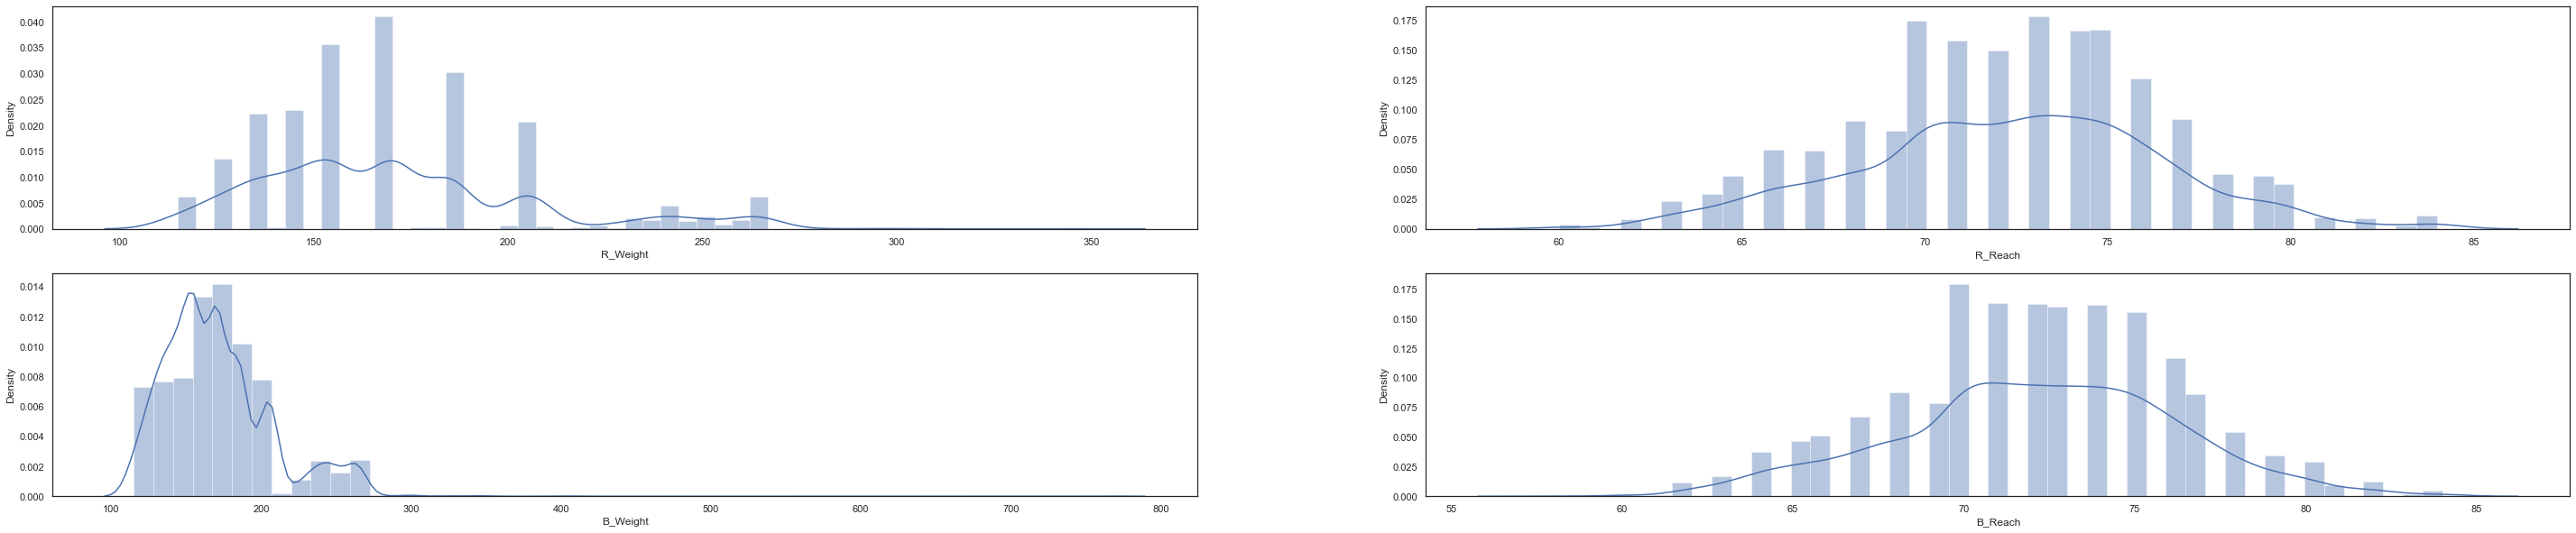

In [77]:
# Create a dist plot to decide if I should use mean, median or mode to fill null values with
fig, axes = plt.subplots(2, 2, figsize=(50,10))
sns.distplot(new_df.R_Weight, ax=axes[0,0])
sns.distplot(new_df.R_Reach, ax=axes[0,1])
sns.distplot(new_df.B_Weight, ax=axes[1,0])
sns.distplot(new_df.B_Reach, ax=axes[1,1])
plt.show()

- The weights looked to be skewed to the right so it will be better to use median or mode rather than the mean. Reason being median and mode are less affected by skewed data. 
- The reach columns look to be fairly normally distributed so I will go ahead and use the mean to fill in the null values. 

In [78]:
# Fix the R_Weight column's null values
new_df['R_Weight'] = new_df.R_Weight.fillna(new_df.R_Weight.median())
new_df.R_Weight.isnull().sum() # Check there are no null values remaining

0

In [79]:
# Fix the R_Reach column's null values
new_df['R_Reach'] = new_df.R_Reach.fillna(new_df.R_Reach.mean())
new_df.R_Reach.isnull().sum() # Check there are no null values remaining

0

In [80]:
# Fix the B_Weight column's null values
new_df['B_Weight'] = new_df.B_Weight.fillna(new_df.B_Weight.median())
new_df.B_Weight.isnull().sum() # Check there are no null values remaining

0

In [81]:
# Fix the R_Reach column's null values
new_df['B_Reach'] = new_df.B_Reach.fillna(new_df.B_Reach.mean())
new_df.B_Reach.isnull().sum() # Check there are no null values remaining

0

In [82]:
new_df.columns[new_df.isnull().any()].tolist() # This will show which columns have null values

['Referee']

## Encode data in order to turn categorical values into numerical values for further analysis


In [83]:
enc = LabelEncoder()

In [84]:
# Get encoded data returned to a variable
data_enc1 = new_df['weight_class']
data_enc1 = enc.fit_transform(data_enc1)

data_enc2 = new_df['R_Stance']
data_enc2 = enc.fit_transform(data_enc2)

data_enc3 = new_df['B_Stance']
data_enc3 = enc.fit_transform(data_enc3)

In [85]:
# Create dataframes with single columns
data_enc1 = pd.DataFrame(data_enc1, columns=['weight_class'])
data_enc2 = pd.DataFrame(data_enc2, columns=['R_Stance'])
data_enc3 = pd.DataFrame(data_enc3, columns=['B_Stance'])

In [86]:
# Update categorical values with numerical values from label encoded data frames
new_df[['weight_class']] = data_enc1[['weight_class']]
new_df[['R_Stance']] = data_enc2[['R_Stance']]
new_df[['B_Stance']] = data_enc3[['B_Stance']]

In [87]:
new_df = pd.concat([new_df, pd.get_dummies(df['win_by'], prefix='win_by')], axis=1)
new_df.drop(['win_by'], axis=1, inplace = True)

In [88]:
pd.options.display.max_rows = None
pd.set_option('display.max_columns', None)

In [89]:
# Assign a numerical value based on who won the fight
new_df['Winner_num'] = new_df.Winner.map({'Red': 0, 'Blue': 1, 'Draw': 2})

In [90]:
# Check my work
new_df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,R_CTRL,B_CTRL,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,R_SIG_STR._att,R_SIG_STR._landed,B_SIG_STR._att,B_SIG_STR._landed,R_TOTAL_STR._att,R_TOTAL_STR._landed,B_TOTAL_STR._att,B_TOTAL_STR._landed,R_TD_att,R_TD_landed,B_TD_att,B_TD_landed,R_HEAD_att,R_HEAD_landed,B_HEAD_att,B_HEAD_landed,R_BODY_att,R_BODY_landed,B_BODY_att,B_BODY_landed,R_LEG_att,R_LEG_landed,B_LEG_att,B_LEG_landed,R_DISTANCE_att,R_DISTANCE_landed,B_DISTANCE_att,B_DISTANCE_landed,R_CLINCH_att,R_CLINCH_landed,B_CLINCH_att,B_CLINCH_landed,R_GROUND_att,R_GROUND_landed,B_GROUND_att,B_GROUND_landed,weight_class,no_of_rounds,R_Height,R_Weight,R_Reach,R_Stance,SLpM_x,Str_Acc_x,SApM_x,Str_Def_x,TD_Avg_x,TD_Acc_x,TD_Def_x,Sub_Avg_x,B_Height,B_Weight,B_Reach,B_Stance,SLpM_y,Str_Acc_y,SApM_y,Str_Def_y,TD_Avg_y,TD_Acc_y,TD_Def_y,Sub_Avg_y,B_age,R_age,country,date_year,win_by_Could Not Continue,win_by_DQ,win_by_Decision - Majority,win_by_Decision - Split,win_by_Decision - Unanimous,win_by_KO/TKO,win_by_Other,win_by_Overturned,win_by_Submission,win_by_TKO - Doctor's Stoppage,Winner_num
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,0.39,0.45,41 of 103,23 of 51,0 of 0,0 of 1,0.0,0.00,0,0,0,0,0:03,0:00,32 of 83,14 of 40,8 of 19,5 of 7,1 of 1,4 of 4,41 of 102,23 of 51,0 of 0,0 of 0,0 of 1,0 of 0,3,0:27,3 Rnd (5-5-5),Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Bantamweight Bout,Red,103,41,51,23,103,41,51,23,0,0,1,0,83,32,40,14,19,8,7,5,1,1,4,4,102,41,51,23,0,0,0,0,1,0,0,0,0,3,170.18,135.0,70.0,1,4.69,44%,2.31,55%,0.00,0%,100%,0.0,165.10,135.0,67.0,1,2.24,41%,4.65,51%,1.07,50%,27%,0.5,32.0,28.0,USA,2021,0,0,0,0,0,1,0,0,0,0,0
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,0.47,0.47,43 of 73,75 of 110,1 of 2,1 of 3,0.5,0.33,1,2,0,1,1:15,4:15,22 of 51,10 of 37,4 of 4,7 of 14,1 of 2,15 of 16,15 of 42,28 of 59,4 of 5,3 of 6,8 of 10,1 of 2,3,5:00,3 Rnd (5-5-5),Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Middleweight Bout,Red,57,27,67,32,73,43,110,75,2,1,3,1,51,22,37,10,4,4,14,7,2,1,16,15,42,15,59,28,5,4,6,3,10,8,2,1,7,3,182.88,185.0,74.0,1,3.26,56%,1.88,62%,1.37,80%,79%,0.3,187.96,205.0,76.0,1,2.98,51%,1.75,61%,1.75,50%,33%,2.2,33.0,29.0,USA,2021,0,0,0,0,1,0,0,0,0,0,0
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,0.77,0.33,14 of 18,2 of 6,0 of 0,0 of 0,0.0,0.00,0,0,0,0,0:10,0:00,10 of 14,1 of 5,0 of 0,0 of 0,4 of 4,1 of 1,9 of 10,2 of 6,0 of 0,0 of 0,5 of 8,0 of 0,1,0:49,3 Rnd (5-5-5),Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Heavyweight Bout,Red,18,14,6,2,18,14,6,2,0,0,0,0,14,10,5,1,0,0,0,0,4,4,1,1,10,9,6,2,0,0,0,0,8,5,0,0,4,3,187.96,264.0,75.0,3,4.38,50%,3.44,50%,0.00,0%,46%,0.0,187.96,241.0,75.0,1,4.33,51%,8.44,41%,0.00,0%,0%,0.0,32.0,28.0,USA,2021,0,0,0,0,0,1,0,0,0,0,0
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,0.47,0.36,49 of 87,136 of 168,0 of 0,4 of 5,0.0,0.80,0,2,3,1,1:04,9:53,26 of 60,10 of 35,5 of 5,0 of 1,0 of 0,5 of 5,26 of 56,15 of 41,2 of 2,0 of 0,3 of 7,0 of 0,3,5:00,3 Rnd (5-5-5),Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Women's Strawweight Bout,Blue,65,31,41,15,87,49,168,136,0,0,5,4,60,26,35,10,5,5,1,0,0,0,5,5,56,26,41,15,2,2,0,0,7,3,0,0,13,3,160.02,115.0,63.0,4,4.10,53%,1.67,65%,0.00,0%,60%,0.0,152.40,115.0,61.0,3,1.00,36%,2.07,52%,4.00,80%,0%,2.0,28.0,26.0,USA,2021,0,0,0,0,1,0,0,0,0,0,1
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,0.47,0.36,59 of 93,92 of 184,2 of 4,1 of 1,0.5,1.00,0,0,0,1,2:15,3:48,14 of 40,29 of 110,7 of 13,15 of 20,9 of 10,7 of 8,25 of 54,36 of 119,5 of 9,13 of 15,0 of 0,2 of 4,3,5:00,3 Rnd (5-5-5),Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Women's Bantamweight Bout,Blue,63,30,138,51,93,59,184,92,4,2,1,1,40,14,110,29,13,7,20,15,10,9,8,7,54,25,119,36,9,5,15,13,0,0,4,2,10,3,167.64,135.0,68.0,1,3.29,41%,3

In [91]:
encode = new_df[['R_fighter','B_fighter','weight_class']].apply(enc.fit_transform)
encode.head()

,R_fighter,B_fighter,weight_class
0,11,691,0
1,1422,1616,7
2,1360,700,4
3,236,1380,13
4,947,1196,10


In [92]:
new_df[['R_fighter','B_fighter','weight_class']] = encode[['R_fighter','B_fighter','weight_class']]

In [93]:
new_df.isnull().sum()

R_fighter                          0
B_fighter                          0
R_KD                               0
B_KD                               0
R_SIG_STR.                         0
B_SIG_STR.                         0
R_SIG_STR_pct                      0
B_SIG_STR_pct                      0
R_TOTAL_STR.                       0
B_TOTAL_STR.                       0
R_TD                               0
B_TD                               0
R_TD_pct                           0
B_TD_pct                           0
R_SUB_ATT                          0
B_SUB_ATT                          0
R_REV                              0
B_REV                              0
R_CTRL                             0
B_CTRL                             0
R_HEAD                             0
B_HEAD                             0
R_BODY                             0
B_BODY                             0
R_LEG                              0
B_LEG                              0
R_DISTANCE                         0
B

### Create a heatmap to see what is highly correlated with winning the fight.

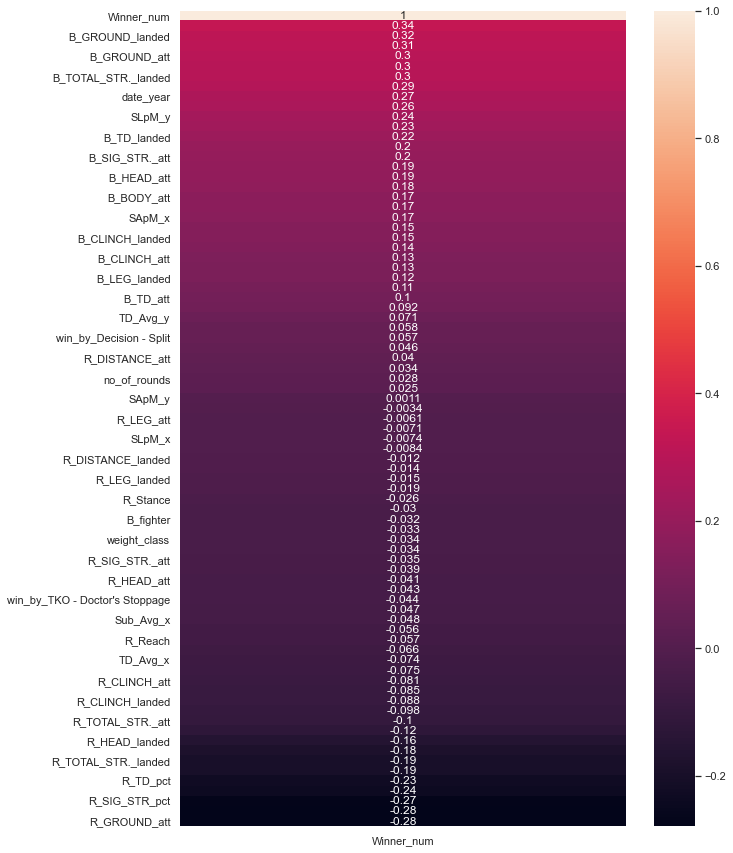

In [94]:
plt.figure(figsize=(10,15))

sns.heatmap(new_df.corr()[['Winner_num']].sort_values(by='Winner_num', ascending = False), annot = True)
plt.show()

- It looks that strikes and ground landed are the most highly correlated with winning the fight. 